# La derivada de una función y su aproximación

**Objetivo**.
- Revisar el concepto de derivada usando herramientas visuales que permitan comprender su sentido geométrico y comprender lo que significa el cambio instantáneo.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922

In [1]:
# Importamos todas las bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sy
import macti.visual
from macti.evaluation import *

In [17]:
quizz = Quizz('q2', 'notebooks', 'local')

<a name='1'></a>
## Introducción

Si revisamos con cuidado, algunas definiciones matemáticas utilizan un tipo de figura literaria conocida como <a href=https://es.wikipedia.org/wiki/Ox%C3%ADmoron>*oxímoron*</a>. En términos simples, un oxímoron consiste en usar dos conceptos de significado opuesto y con ello generar un tercer concepto. 

Por ejemplo: **La razón de cambio instantáneo**. 
- Cuando se habla de un *cambio*, se requiere de la comparación entre dos o más estados y con ello analizar las diferencias entre un estado y otro; 
- por otro lado, la palabra *instantáneo* tiene que ver con algo que dura un solo instante, es decir un tiempo puntal. 

Entonces el concepto "**cambio instantáneo**" representa un oxímoron. Pero ¿cuál es su significado?
¿Será importante este concepto en nuestra vida diaria?

En lo que sigue veremos que la razón de cambio instantáneo tiene que ver con un concepto muy importante en Cálculo: **la derivada**.

<a name='2'></a>
## La curva del olvido.

Un estudiante de lenguas participará en un concurso internacional cuyo principal reto es el conocimiento del vocabulario de un cierto idioma. Por ello, es importante que el estudiante utilice un método de estudio adecuado para recordar el significado del mayor número de palabras posible.

La <a href=https://es.wikipedia.org/wiki/Curva_del_olvido>curva del olvido</a> puede ayudar al estudiante a generar un plan de estudio adecuado. La función que define esta curva es la siguiente:

$$
R(t) = e^{-t/S}
$$

donde $R$ es cuanto recordamos, $S$ es la intensidad del recuerdo y $t$ el tiempo. Podemos definir $S \in (0,1]$, donde $1$ es la máxima intensidad de recuerdo y un valor cercano a $0$ corresponde a algo que no nos interesa nada.

**Observación**: $S$ no puede ser exactamente $0$ por que en ese caso la función $R(t)$ no está definida.

La siguiente gráfica muestra cómo decrecen nuestros recuerdos con el paso del tiempo.

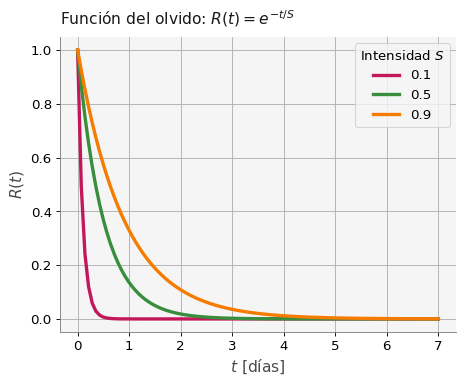

In [3]:
# Primero definimos la función del olvido
def R(t, S=0.9):
    return np.exp(-t/S)

# Dominio de tiempo (hasta 7 días).
t = np.linspace(0,7,100)

# Tres curvas del olvido para tres valores de S
plt.plot(t, R(t,0.1), lw=3, c='C3', label='{}'.format(0.1))
plt.plot(t, R(t,0.5), lw=3, c='C2', label='{}'.format(0.5))
plt.plot(t, R(t,0.9), lw=3, c='C1', label='{}'.format(0.9))

# Configuración de la gráfica. 
plt.title("Función del olvido: $R(t)=e^{-t/S}$")
plt.ylabel("$R(t)$")
plt.xlabel("$t$ [días]")
plt.legend(title = 'Intensidad $S$')
plt.grid()
plt.show()

<a name='2-1'></a>
### ¿Cuánto tiempo dura el recuerdo?

¿Será posible determinar cada cuanto tiempo el estudiante debe repasar las palabras para que no las olvide y pueda ganar el concurso? ¿De qué depende esto?

Tomemos por ejemplo el caso de $S=0.9$ (curva naranja). ¿En qué parte de la gráfica se incrementa el olvido? en otras palabras ¿en qué parte de la gráfica el descenso es más rápido?

Para conocer ese descenso, debemos calcular la pendiente $m$ y eso lo podemos hacer con la siguiente fórmula:

$$
m = \frac{R(t_2) - R(t_1)}{t_2 - t_1} \tag{1}
$$

donde $t_1$ y $t_2$ son dos tiempos distintos.

Si definimos $h = t_2 - t_1$ y $t = t_1$ podemos escribir la fórmula $(1)$ como sigue:

$$
m(t) = \frac{R(t + h) - R(t)}{h} \tag{2}
$$

En esta última fórmula vemos que la pendiente depende de $t$, es decir, en qué día nos encontramos.

Vamos a calcular $R(t)$ y $m(t)$ en $t = [0,1,2,3,4,5,6,7]$, para $h = 1$ :

In [4]:
h = 1.0
td = np.arange(0,8,h) # Definición de las t = 0,1,2,...,7
r = np.zeros(len(td)) # Arreglo para almacenar el valor de R
m = np.zeros(len(td)) # Arreglo para almacenar las pendientes

print('td = {}'.format(td))
print('r = {}'.format(r))
print('m = {}'.format(m))

td = [0. 1. 2. 3. 4. 5. 6. 7.]
r = [0. 0. 0. 0. 0. 0. 0. 0.]
m = [0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# Hacemos los cálculos en cada uno de los días
for i, t in enumerate(td):
    r[i] = R(t)                  # Función del olvido
    m[i] = (R(t + h) - R(t)) / h # Pendiente

# Ponemos la información en un DataFrame y la mostramos
tabla = pd.DataFrame(np.array([td, r, m]).T, 
                     columns = ['$t$', '$R(t)$', '$m(t)$'])
tabla

,$t$,$R(t)$,$m(t)$
0,0.0,1.000000,-0.670807
1,1.0,0.329193,-0.220825
2,2.0,0.108368,-0.072694
3,3.0,0.035674,-0.023930
4,4.0,0.011744,-0.007878
5,5.0,0.003866,-0.002593
6,6.0,0.001273,-0.000854
7,7.0,0.000419,-0.000281


Observa que la pendiente es negativa, lo cual indica un decrecimiento. También la magnitud de la pendiente (su valor absoluto) disminuye conforme $t$  avanza. Vemos que el recuerdo disminuye mucho al principio, de tal manera que en el tercer día ya casi no se recuerda nada, alrededor del $3.5\%$. Esto se ve de manera gráfica como sigue:

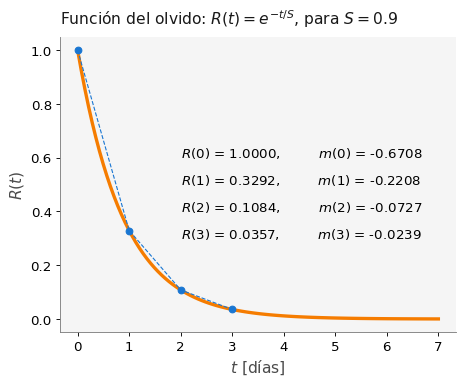

In [9]:
# Dominio de tiempo (hasta 7 días).
t = np.linspace(0,7,100)

# La curva del olvido para S = 0.9
plt.plot(t, R(t), lw=3, c='C1')

# Línea punteada
plt.plot([0,1,2,3], [R(0), R(1), R(2), R(3)], 'o--', lw=1, zorder=5)

# Configuración de la gráfica. 
plt.title("Función del olvido: $R(t)=e^{-t/S}$, para $S = 0.9$")
plt.ylabel("$R(t)$")
plt.xlabel("$t$ [días]")

# Información de los primeros 3 días
plt.text(2,0.6,'$R$({2:}) = {0:5.4f},\t $m$({2:}) = {1:5.4f}'.format(R(0), m[0], 0))
plt.text(2,0.5,'$R$({2:}) = {0:5.4f},\t $m$({2:}) = {1:5.4f}'.format(R(1), m[1], 1))
plt.text(2,0.4,'$R$({2:}) = {0:5.4f},\t $m$({2:}) = {1:5.4f}'.format(R(2), m[2], 2))
plt.text(2,0.3,'$R$({2:}) = {0:5.4f},\t $m$({2:}) = {1:5.4f}'.format(R(3), m[3], 3))
plt.show()

En la gráfica anterior, la línea punteada nos muestra gráficamente el cambio en la pendiente de la recta que une los puntos negros, los cuales indican los días. Lo que estamos observando es la razón de cambio de $R(t)$ en intervalos de tiempo de longitud $h = 1$. **Esto es justamente lo que expresa la fórmula $(2)$**. 

Los valores de $R$ para los diferentes días indican como es que vamos olvidando lo que estudiamos en el día 0. Para el día 1 ya solo recordamos el $32.92\%,$ en el segundo día el recuerdo es del $10.84\%$ y para el día 3 el recuerdo es mínimo, del $3.57\%$. Por lo tanto, es conveniente repasar lo aprendido en el día 0 de manera frecuente, para este caso con $S=0.9$, sería conveniente repasar todos los días.

¿Para este ejemplo, cómo podemos calcular **la razón de cambio instantáneo**? La respueta es: haciendo $h$ muy pequeña, es decir $h \to 0$. 

Para ello, esta razón debería calcularse en un solo instante de tiempo, lo cual implica que $t_1 = t_2 \Longrightarrow h = 0$, y esto nos lleva a que la fórmula de $m(t)$ no está bien definida (¡división por cero!). 

Pero, ¿qué pasa si $h$ se hace muy pequeña? es decir:

$$
\lim_{h \to 0}  \frac{R(t + h) - R(t)}{h} \tag{3} = ¿?
$$

¿Cúanto vale este límite? ¿Es posible calcularlo en cualquier caso y para cualquier tipo de función?

<div class="alert alert-info">

### Ejemplo 1. ¿Qué pasa cuando $h \to 0$ para diferentes valores de $S$?.

<font color="Black">
    
Ejecuta la siguiente celda de código para generar el interactivo en donde podrás modificar $S$, $h$ y $t$. Explora qué sucede para cada valor de los parámetros y posteriomente responde las preguntas del [Ejercicio 1](#quiz-1).

Para ver los valores de $R(t)$, $R^\prime(t)$ y $m(t)$ haz clic sobre el botón `Muestra valores` sobre el interactivo


</font>

</div>


In [10]:
%run "./zinteractivo1.ipynb"

interactive(children=(FloatSlider(value=0.9, description='S', max=1.0, min=0.3, step=0.2), FloatSlider(value=1…

<function __main__.razonDeCambio(S, h, i0, anot)>

**Comentarios.**

En la gráfica de la izquierda observamos que conforme $h$ se hace más pequeño, observamos que la línea roja se aproxima cada vez mejor a la línea tangente (verde) que pasa por el punto rojo. La línea roja representa una aproximación a la razón de cambio instantánea en el punto rojo.

En la gráfica de la derecha observamos la gráfica de $R^\prime(t)$ (curva verde), un punto morado que representa el valor exacto de $R^\prime(t)$ y un punto negro que es la aproximación para una $h$ dada.

Entonces, la tangente en el punto rojo, no es otra cosa que **la razón de cambio instantánea**. Veremos enseguida que ambas cosas representan un concepto conocido como **la derivada de la función** en el punto rojo.

<a name='quiz-1'></a>

<div class="alert alert-success">

### Ejercicio 1.

<font color="black"> 

El valor absoluto de la diferencia entre un valor exacto ($v_{e}$) y un valor aproximado ($v_{a}$) se conoce como el **error absoluto** y se escribe como sigue:
$$
E_a = |v_e - v_a| \tag{4}
$$
Usando esta definición, responde las siguientes preguntas. 

1. ¿Cuál es la diferencia entre $R'(1)$ y $m(1)$ redondeada a 4 decimales
para $S = 0.9$, $t = 1.0$ y $h = 1.0$? Completa el código de la celda siguiente para obtener la respuesta.

</font>

</div>


<div class="alert alert-danger">
    
**NOTA.**
Para responder las preguntas, tienes que mover los parámetros en el interactivo a los valores correspondientes de $S$, $h$ y $t$; posteriormente realiza los cálculos necesarios para obtener la respuesta correcta. No olvides revisar las reglas de redondeo.
</div>

<div class="alert alert-success">
    
**Hint:**
calcula $|R'(1) - m(1)|$, usando las funciones `abs()` para calcular el valor absoluto y `round()` para redondear un número hasta un cierto número de dígitos. Puedes usar `help(abs)` y `help(round)` para obtener ayuda sobre el uso de estas funciones.
</div>


In [15]:
# Define ve, va y Ea_1:
# ve = ... # valor exacto R'(1) 
# va = ... # valor aproximado m(1) con h = 1.0
# Ea_1 = ... # Error absoluto
### BEGIN SOLUTION
ve = -0.36576999
va = -0.22082496
Ea_1 = round(abs(round(ve,4) - round(va,4)), 4)

file_answer = FileAnswer()
file_answer.write('1', Ea_1)
### END SOLUTION

print(Ea_1)

0.145


In [18]:
quizz.eval_numeric('1', Ea_1)

----------------------------------------
1 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">
<font color="black"> 

2. Cuál es la diferencia entre $R'(1)$ y $m(1)$ redondeada a 4 decimales
para $S = 0.9$, $t = 1.0$ y $h = 0.1$

</font>
</div>

In [20]:
# Define ve, va y Ea_2:
# ve = ... # valor exacto R'(1) 
# va = ... # valor aproximado m(1) con h = 0.1
# Ea_2 = ... # Error absoluto
### BEGIN SOLUTION
ve = -0.36576999
va = -0.34618159
Ea_2 = round(abs(round(ve,4) - round(va,4)), 4)

file_answer.write('2', Ea_2)
### END SOLUTION

print(Ea_2)

0.0196


In [21]:
quizz.eval_numeric('2', Ea_2)

----------------------------------------
2 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">
<font color="black"> 

3. ¿Qué sucede con la diferencia entre $R^\prime(t)$ y $m(t)$, cuando $h$ se hace más pequeño ($h\to 0$), sin importar el valor de $t$ ni de $S$?
    1. Se hace más grande.
    2. Se mantiene constante.
    3. Se hace más pequeña.
    4. No es posible determinarlo.

</font>
</div>

In [22]:
# Escribe tu respuesta como sigue 
# respuesta = ...

### BEGIN SOLUTION
respuesta = 'c'

file_answer.write('3', respuesta)
### END SOLUTION

El directorio :/home/jovyan/macti_notes/notebooks/.ans/Derivada/ ya existe
Respuestas y retroalimentación almacenadas.


In [23]:
quizz.eval_option('3', respuesta)

----------------------------------------
3 | Tu respuesta: c, es correcta.
----------------------------------------


<div class="alert alert-success">
<font color="black"> 

4. Escribe una función para calcular la fórmula (4) que reciba el valor exacto ($v_e$), el valor aproximado ($v_a$) y el número de decimales de la aproximación ($p$) y que regrese el error absoluto entre $v_e$ y $v_a$. Posteriomente pruebe la función con el valor de $R^\prime(t)$ (valor exacto) y el valor de $m(t)$ (valor aproximado) con los siguientes parámetros:

    1. $S = 0.3, t = 0, h = 1, p = 6$
    2. $S = 0.3, t = 0, h = 0.1, p = 6$
    3. $S = 0.3, t = 6, h = 1.0, p = 10$
    4. $S = 0.3, t = 6, h = 0.1, p = 10$

</font>
</div>

In [36]:
# Completa la función de error con la fórmula (4)
def error_absoluto(ve, va, p):
    ### BEGIN SOLUTION
    return round(abs(round(ve,p) - round(va,p)), p)
    ### END SOLUTION

In [37]:
# Define ve, va y p con los valores del inciso A.
# ve = ... # valor exacto R'(t) 
# va = ... # valor aproximado m(t)
# p = ...  # precisión

### BEGIN SOLUTION
ve = -3.3333333333
va = -0.9643260067
p = 6
EA = error_absoluto(ve, va, p) # S = 0.3, t = 0, h = 1

file_answer.write('4A', EA)
### END SOLUTION

print(EA)

2.369007


In [27]:
quizz.eval_numeric('4A', EA)

----------------------------------------
4A | Tu resultado es correcto.
----------------------------------------


In [38]:
# Define ve, va y p con los valores del inciso B.
# ve = ... # valor exacto R'(t) 
# va = ... # valor aproximado m(t)
# p = ...  # precisión

### BEGIN SOLUTION
ve = -3.3333333333
va = -2.8346868943
p = 6
EB = error_absoluto(ve, va, p) # S = 0.3, t = 0, h = 0.1

file_answer.write('4B', EB)
### END SOLUTION

print(EB)

0.498646


In [29]:
quizz.eval_numeric('4B', EB)

----------------------------------------
4B | Tu resultado es correcto.
----------------------------------------


In [39]:
# Define ve, va y p con los valores del inciso C.
# ve = ... # valor exacto R'(t) 
# va = ... # valor aproximado m(t)
# p = ...  # precisión

### BEGIN SOLUTION
ve = -0.0000000069
va = -0.0000000020
p = 10
EC = error_absoluto(ve, va, p) # S = 0.3, t = 0, h = 0.1

file_answer.write('4C', EC)
### END SOLUTION

print(EC)

4.9e-09


In [31]:
quizz.eval_numeric('4C', EC)

----------------------------------------
4C | Tu resultado es correcto.
----------------------------------------


In [40]:
# Define ve, va y p con los valores del inciso D.
# ve = ... # valor exacto R'(t) 
# va = ... # valor aproximado m(t)
# p = ...  # precisión
### BEGIN SOLUTION
ve = -0.0000000069
va = -0.0000000058
p = 10
ED = error_absoluto(ve, va, p) # S = 0.3, t = 6, h = 0.1

file_answer.write('4D', ED)
### END SOLUTION

print(ED)

1.1e-09


In [33]:
quizz.eval_numeric('4D', ED)

----------------------------------------
4D | Tu resultado es correcto.
----------------------------------------


<a name='3'></a>
## Definición de derivada

La fórmula $(3)$ no es otra cosa que la definición formal de la derivada de una función. En casi todos los libros de cálculo encontrarás la siguiente notación para la derivada de la función $f(x)$:

$$ 
\frac{d f}{dx} = f^\prime(x)=\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \tag{5}
$$

La derivada existe siempre y cuando exista este límite. ¿Puedes imaginar cuando este límite no existe? 

Observe que en la definición anterior se está calculando la pendiente de la función $f(x)$ en $x$. ¿Cuándo es que esta pendiente no se puede calcular?

<div class="alert alert-info">

### Ejemplo 2. Aproximación de la derivada hacia adelante y hacia atrás.

<font color="black">

Ejecuta la siguiente celda de código. Obtendrás un interactivo en donde podrás modificar $h$ y $x$.<br>
* Explora los valores de $f^\prime$, $m$ y del Error Absoluto cuando modificas $x$ y $h$.
* Observa lo que sucede cuando activas el botón `Hacia atrás`.
* ¿El error absoluto es menor o mayor con el botón `Hacia atrás` activado? ¿De qué depende?

</font>

</div>

In [41]:
%run "./zinteractivo2.ipynb"

interactive(children=(FloatSlider(value=1.0, description='h', max=2.0, min=0.1), FloatSlider(value=6.0, descri…

<function __main__.derivada(h, x0, back)>


Observamos en el interactivo anterior que también es posible calcular la derivada "hacia atrás" lo cual significa usar un punto a la izquierda del lugar donde se desea obtener la derivada (punto rojo). Esto se puede escribir analíticamente de la siguiente manera:

$$ 
\frac{d f}{dx} = f^\prime(x)=\lim_{h \to 0} \frac{f(x) - f(x-h)}{h} \tag{6}
$$

Entonces, las ecuaciones $(5)$ y $(6)$ indican dos maneras de calcular la derivada en un punto, pero que deben coincidir cuando $h \to 0$.

Se puede pensar en el límite por la derecha, ecuación $(5)$ y el límite por la izquierda, ecuación $(6)$. Ambos deben existir y deben ser iguales para que la derivada en un punto dado exista.

<a name='2-1'></a>
## ¿Cómo calcular la derivada analíticamente?

Consideremos la función $f(x) = x^3$ y apliquemos la definición de derivada:

$$
\frac{d f}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} = \lim_{h \to 0} \frac{(x + h)^3 - x^3}{h}
$$

Si expandimos los términos del numerador obtenemos:

$$
\frac{d f}{dx} = \lim_{h \to 0} \, (3x^2 + 3 x h + h ^2) \tag{7}
$$

Al calcular el límite de la derecha obtenemos:

$$
\frac{d f}{dx} = 3x^2
$$

Hemos calculado la derivada analítica de $f(x) = x^3$. 


**¿Podrías calcular la derivada analíticamente usando la definición de la ecuación $(6)$?**

<div class="alert alert-success">

### Ejercicio 3. Derivada analítica hacia atrás.

<font color="DarkBlue">

Escribe en la variable `respuesta` la fórmula que está entre paréntesis en la ecuación $(7)$.

</font>

In [34]:
# Escribe tu respuesta como sigue 
# respuesta = ...

### BEGIN SOLUTION

x = sy.Symbol('x')
resultado = 3*x**2-3*x*h+h**2

file_answer.write('5', str(resultado))
file_answer.to_file('q2')
### END SOLUTION

El directorio :/home/jovyan/macti_notes/notebooks/.ans/Derivada/ ya existe
Respuestas y retroalimentación almacenadas.


In [35]:
quizz.eval_expression('5', resultado)

----------------------------------------
5 | Tu respuesta:


3*x**2 - 3.0*x + 1.0

es correcta.
----------------------------------------
